In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

from scipy import stats
import researchpy as rp

In [3]:
bp = pd.read_csv('datasets/blood_pressure.csv') # bp = blood-pressure readings

In [4]:
bp.sample(10)

,patient,sex,agegrp,bp_before,bp_after
36,37,Male,46-59,149,157
52,53,Male,60+,172,175
92,93,Female,46-59,144,157
91,92,Female,46-59,162,132
5,6,Male,30-45,150,147
86,87,Female,46-59,143,148
19,20,Male,30-45,162,150
106,107,Female,60+,173,167
22,23,Male,46-59,151,136
11,12,Male,30-45,173,159


In [5]:
bp.shape

(120, 5)

In [6]:
bp.describe().T # .T converts columns to rows and rows to columns

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


In [7]:
bp.describe()

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


<AxesSubplot:>

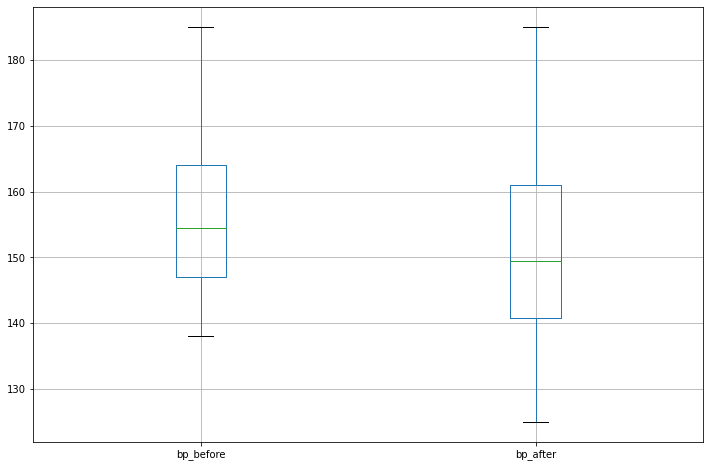

In [8]:
bp[['bp_before', 'bp_after']].boxplot(figsize=(12, 8))

In [11]:
stats.levene(bp['bp_after'], bp['bp_before'])

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

In [12]:
bp['bp_diff'] = scale(bp['bp_after'] - bp['bp_before'])

In [13]:
bp[['bp_diff']].head()

,bp_diff
0,0.906743
1,0.726496
2,1.207155
3,-0.354987
4,0.005508


array([[<AxesSubplot:title={'center':'bp_diff'}>]], dtype=object)

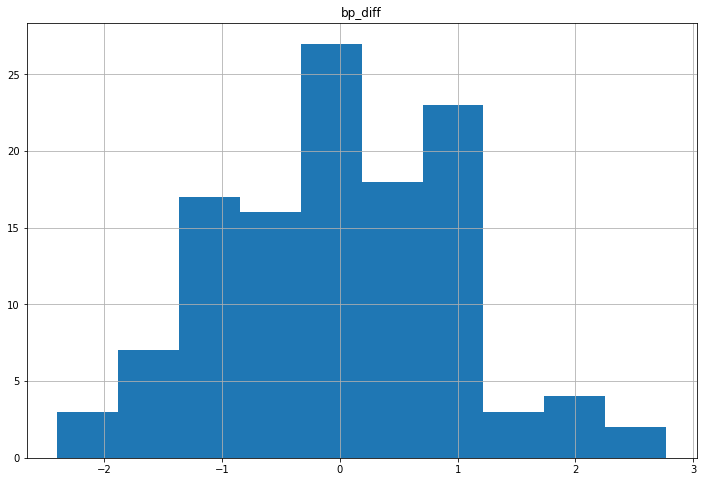

In [16]:
bp[['bp_diff']].hist(figsize=(12, 8))

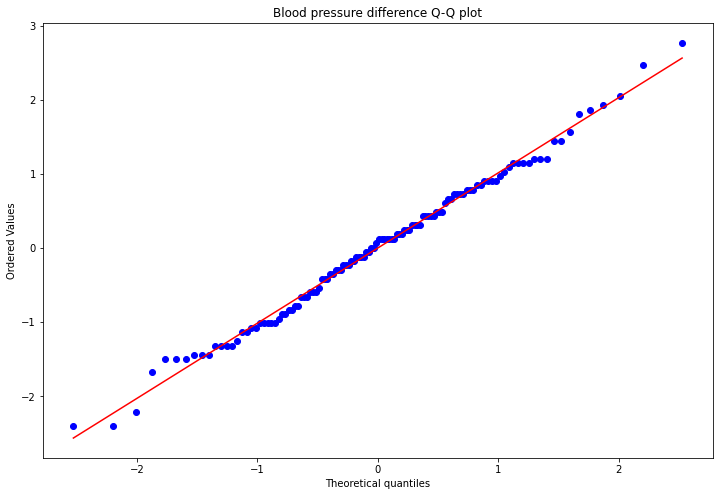

In [17]:
plt.figure(figsize=(12, 8))
stats.probplot(bp['bp_diff'], plot=plt)

plt.title('Blood pressure difference Q-Q plot')
plt.show()

In [18]:
stats.shapiro(bp['bp_diff'])

ShapiroResult(statistic=0.9926842451095581, pvalue=0.7841846942901611)

In [19]:
stats.ttest_rel(bp['bp_after'], bp['bp_before'])

Ttest_relResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823)

In [21]:
rp.ttest(bp['bp_after'], bp['bp_before'],
        paired=True, equal_variances=False)

C:\Users\Enlarged Squash\AppData\Roaming\Python\Python39\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


,Wilcoxon signed-rank test,results
0,Mean for bp_after =,151.358333
1,Mean for bp_before =,156.450000
2,W value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000


In [ ]:
# We conclude that with aa low p-value in the wilcoxon test, there is a significant difference between the before and after columns